In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('D://TrabajoGrado//CodiDatos//archive//Folds.csv') #Direccion de la ruta del archivo cvs del dataset 
data

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...,...,...,...
39540,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39541,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...


In [3]:
#Renombra la columna filename a path 
data= data.rename(columns={'filename':'path'})

#Crea una nueva columna label 
data['label'] = data.path.apply(lambda x: x.split('/')[3])

#Crea una nueva columna label 
data['tipo'] = data.path.apply(lambda x: x.split('/')[5])

#Crea una nueva columna label 
data['mf'] = data.path.apply(lambda x: x.split('/')[7])


#convertir etiquetas a indices enteros 
class_names = ['benign', 'malignant']

data['label_int'] = data.label.apply(lambda x: class_names.index(x))


#crea nueva columna con el nombre filename 
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])



data.head(3)



,fold,mag,grp,path,label,tipo,mf,label_int,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,adenosis,100X,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,adenosis,100X,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,adenosis,100X,0,SOB_B_A-14-22549AB-100-003.png


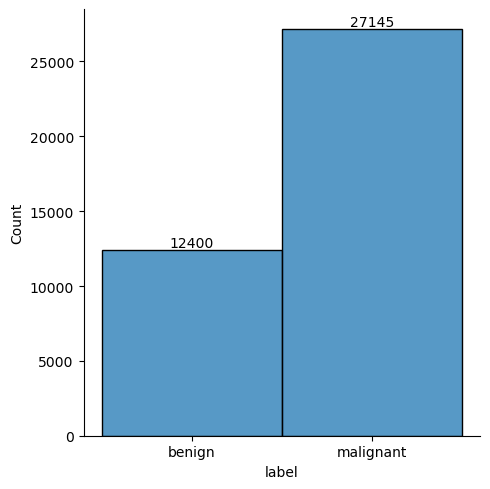

Count of Benign    :  12400
Count of Malignant :  27145


In [4]:
ax = sns.displot(data=data, x='label', kind='hist')


# Obtener las alturas de las barras
bars = ax.ax.patches

# Agregar etiquetas con los valores de altura en cada barra
for bar in bars:
    height = bar.get_height()
    ax.ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Mostrar el histograma
plt.show()



print('Count of Benign    : ', data[data.label == 'benign'].label.count())
print('Count of Malignant : ', data[data.label == 'malignant'].label.count())

In [6]:
#Resumen estadistico
data.describe()

,fold,mag,label_int
count,39545.000000,39545.000000,39545.000000
mean,3.000000,179.352636,0.686433
std,1.414231,133.669274,0.463948
min,1.000000,40.000000,0.000000
25%,2.000000,40.000000,0.000000
50%,3.000000,100.000000,1.000000
75%,4.000000,200.000000,1.000000
max,5.000000,400.000000,1.000000


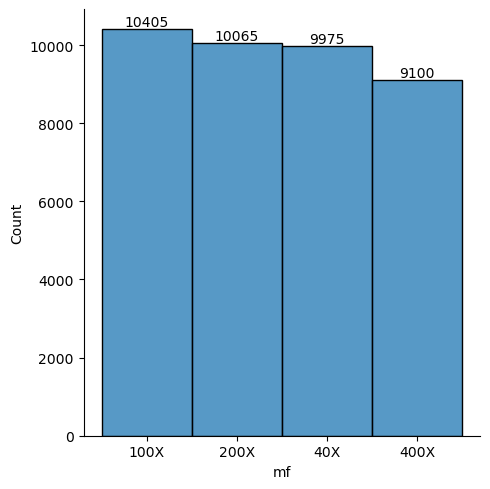

Count of 40 :  9975
Count of 100 :  10405
Count of 200 :  10065
Count of 400 :  9100


In [7]:

ax = sns.displot(data=data, x='mf')

# Obtener las alturas de las barras
bars = ax.ax.patches

# Agregar etiquetas con los valores de altura en cada barra
for bar in bars:
    height = bar.get_height()
    ax.ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Mostrar el histograma
plt.show()

print('Count of 40 : ', data[data.mf == '40X'].mf.count())
print('Count of 100 : ', data[data.mf == '100X'].mf.count())
print('Count of 200 : ', data[data.mf == '200X'].mf.count())
print('Count of 400 : ', data[data.mf == '400X'].mf.count())




In [8]:
# Usar crosstab para analizar la relación entre 'column1' y 'column2'
relation = pd.crosstab(data['label'], data['mf'])

# Mostrar la tabla de contingencia
print("\nRelación entre 'column1' y 'column2':")
print(relation)


Relación entre 'column1' y 'column2':
mf         100X  200X  400X   40X
label                            
benign     3220  3115  2940  3125
malignant  7185  6950  6160  6850


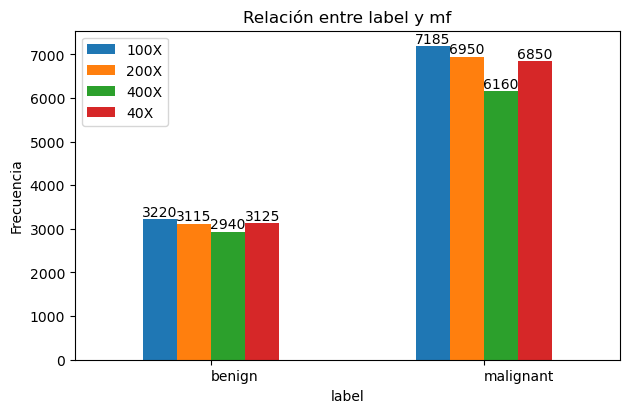

In [9]:
# Crear un gráfico de barras de la tabla de contingencia
ax = relation.plot(kind='bar' )

# Personalizar el gráfico
plt.title('Relación entre label y mf')
plt.ylabel('Frecuencia')
ax.legend()


# Agregar cada número a cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Separar las barras de cada etiqueta
plt.tight_layout()

# Separar más las etiquetas en el eje x
plt.xticks(rotation=360, ha='left')

# Mostrar el gráfico
plt.show()

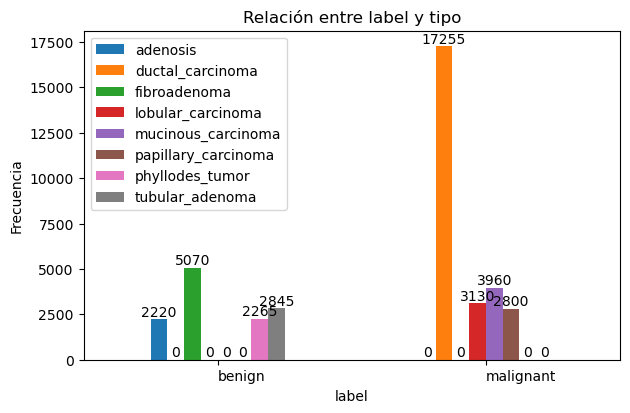

In [14]:
ax = relation.plot(kind='bar' )

# Personalizar el gráfico
plt.title('Relación entre label y tipo')
plt.ylabel('Frecuencia')
ax.legend()


# Agregar cada número a cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Separar las barras de cada etiqueta
plt.tight_layout()

# Separar más las etiquetas en el eje x
plt.xticks(rotation=360, ha='left')

# Mostrar el gráfico
plt.show()